# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import sem
from scipy.stats import linregress
import os
import csv
import random
import numpy as np
import requests
from pprint import pprint
from config import api_key

## Generate Cities List

In [2]:
### Generate a random Lat Long table to generate a cities list:  
latlist = []
longlist = []
for i in range(0,1300):
    latlist.append(float(random.randrange(-90, 90))*1.00249)
    longlist.append(float(random.randrange(-180, 180))*1.00249)

dict_with_lists = {"Latitude": latlist,
                   "Longitude": longlist}
RandomLatLong_df = pd.DataFrame(dict_with_lists)

RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Longitude"]>=-180)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Longitude"]<=180)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Latitude"]>=-90)]
RandomLatLong_df = RandomLatLong_df.loc[(RandomLatLong_df["Latitude"]<=90)]

RandomLatLong_df


,Latitude,Longitude
0,5.01245,132.32868
1,-5.01245,-29.07221
2,-56.13944,116.28884
3,12.02988,-147.36603
4,-42.10458,56.13944
...,...,...
1295,75.18675,-151.37599
1296,-88.21912,136.33864
1297,-31.07719,53.13197
1298,56.13944,143.35607


In [3]:
### Generate a random cities from Lat Long table make sure we have up to 500. Delete any duplicates: 
cityList = []
countryList = []

for index, row in RandomLatLong_df.iterrows():
#     print(f"Searching for nearest city to lat long {row['Latitude'], row['Longitude']}...")
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cityName = city.city_name
    cityCountry = city.country_code
    RandomLatLong_df.loc[index,"City_Name"] = cityName
    RandomLatLong_df.loc[index,"Country"] = cityCountry
    cityList.append(cityName)
    countryList.append(cityCountry)

### Trying to identify and remove any duplicate cities and update my cities and country list and lat long lists
CleanLatLong_df = RandomLatLong_df.drop_duplicates(subset = ['City_Name'])
citySeries = CleanLatLong_df['City_Name']
countrySeries = CleanLatLong_df['Country']
LatSeries = CleanLatLong_df['Latitude']
LongSeries = CleanLatLong_df['Longitude']
cityList = citySeries.values.tolist()
countryList = countrySeries.values.tolist()
LatList = LatSeries.values.tolist()
LongList = LongSeries.values.tolist()

citySeries

0       kloulklubed
1          cabedelo
2            albany
3              hilo
4         taolanaro
           ...     
1290     hammerfest
1291      dalbandin
1293         tsumeb
1294       takoradi
1298           okha
Name: City_Name, Length: 525, dtype: object

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "London"
# Build partial query URL
base_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key

In [5]:
# set up lists to hold reponse info
tempsList = []
humidityList = []
cloudinessList = []
windspeedsList = []
defective_cities = []

# Loop through the list of cities and perform a request for data on each
for city in cityList:
#     print(f"Searching for city weather data for {city}...") 
    weather_url = url + "q=" + city + "&units=" + units + "&appid=" + api_key
    response = requests.get(weather_url).json()
    try:
        tempsList.append(response['main']['temp_max'])
        humidityList.append(response['main']['humidity'])
        cloudinessList.append(response['clouds']['all'])
        windspeedsList.append(response['wind']['speed'])
    except:
#         print(f"Oops, looks like this city: {city} gave us a problem.")
        defective_cities.append(city)
        tempsList.append('NaN')
        humidityList.append('NaN')
        cloudinessList.append('NaN')
        windspeedsList.append('NaN')

defective_cities

['taolanaro',
 'grand river south east',
 'marcona',
 'illoqqortoormiut',
 'tumannyy',
 'haibowan',
 'samalaeulu',
 'barentsburg',
 'belushya guba',
 'malwan',
 'sentyabrskiy',
 'formoso do araguaia',
 'shchelyayur',
 'tsihombe',
 'amderma',
 'jabiru',
 'temaraia',
 'louisbourg',
 'aflu',
 'palabuhanratu',
 'chagda',
 'mys shmidta',
 'labutta',
 'attawapiskat',
 'yanchukan',
 'gilazi',
 'makung',
 'nizhneyansk',
 'sumbawa',
 'longlac',
 'saryshagan',
 'viligili',
 'vaitupu',
 'meyungs',
 'ust-kamchatsk',
 'kamenskoye',
 'sinjah',
 'skovde']

In [6]:
#  Making sure I have >= 500 cities
print(f"Cities list : {len(cityList)}")
# print(f"Latitudes list : {len(latlist)}")
# print(f"Longitudes list : {len(longlist)}")

Cities list : 525


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
dict_with_lists2 = {"City": cityList, 
                    "Latitude": LatList, 
                    "Longitude": LongList, 
                    "Max_Temp": tempsList, 
                    "Humidity": humidityList, 
                    "Cloudiness": cloudinessList, 
                    "Wind_Speed": windspeedsList, 
                    "Country_Code": countryList}
weather_data_500 = pd.DataFrame(dict_with_lists2)
weather_data_500 = weather_data_500.dropna(how='any')
weather_data_500 = weather_data_500[~weather_data_500.Max_Temp.str.contains("NaN", na=False)]
weather_data_500.head(100)

#  Making sure I have >= 500 cities
print(weather_data_500["City"].value_counts())

camapua           1
tiksi             1
puerto ayora      1
ada               1
labuhan           1
                 ..
faanui            1
little current    1
starachowice      1
glencoe           1
san isidro        1
Name: City, Length: 487, dtype: int64


In [8]:
# To remove cities with Humidity > 100%
print(f"Minimum humidity value: {weather_data_500['Humidity'].min()}")
print(f"Maximum humidity value: {weather_data_500['Humidity'].max()}")
# weather_data_500_hum100 = weather_data_500[weather_data_500.Humidity<=100]
# weather_data_500_hum100['Humidity'].max()


Minimum humidity value: 1
Maximum humidity value: 100


In [9]:

# Create lists and dicts needed
Lat_City_Mean_List = []
Long_City_Mean_List = []
Temp_City_Mean_List = []
Hum_City_Mean_List = []
Cloud_City_Mean_List = []
Wind_City_Mean_List = []

# columnsList = ["Latitude", "Longitude", "Max_Temp", "Humidity", "Cloudiness", "Wind_Speed"]

Lat_City_Mean_List.append(len(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.mean(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.median(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.std(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.min(weather_data_500["Latitude"]))
Lat_City_Mean_List.append(np.max(weather_data_500["Latitude"]))
quartiles = weather_data_500["Latitude"].quantile([.25,.5,.75])
quartiles
latQ1 = quartiles[0.25]
latQ2 = quartiles[0.50]
latQ3 = quartiles[0.75]
Lat_City_Mean_List.append(latQ1)
Lat_City_Mean_List.append(latQ2)
Lat_City_Mean_List.append(latQ3)

Long_City_Mean_List.append(len(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.mean(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.median(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.std(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.min(weather_data_500["Longitude"]))
Long_City_Mean_List.append(np.max(weather_data_500["Longitude"]))
quartiles = weather_data_500["Longitude"].quantile([.25,.5,.75])
quartiles
lngQ1 = quartiles[0.25]
lngQ2 = quartiles[0.50]
lngQ3 = quartiles[0.75]
Long_City_Mean_List.append(lngQ1)
Long_City_Mean_List.append(lngQ2)
Long_City_Mean_List.append(lngQ3)

Temp_City_Mean_List.append(len(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.mean(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.median(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.std(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.min(weather_data_500["Max_Temp"]))
Temp_City_Mean_List.append(np.max(weather_data_500["Max_Temp"]))
quartiles = weather_data_500["Max_Temp"].quantile([.25,.5,.75])
quartiles
tempQ1 = quartiles[0.25]
tempQ2 = quartiles[0.50]
tempQ3 = quartiles[0.75]
Temp_City_Mean_List.append(tempQ1)
Temp_City_Mean_List.append(tempQ2)
Temp_City_Mean_List.append(tempQ3)

Hum_City_Mean_List.append(len(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.mean(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.median(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.std(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.min(weather_data_500["Humidity"]))
Hum_City_Mean_List.append(np.max(weather_data_500["Humidity"]))
quartiles = weather_data_500["Humidity"].quantile([.25,.5,.75])
quartiles
humQ1 = quartiles[0.25]
humQ2 = quartiles[0.50]
humQ3 = quartiles[0.75]
Hum_City_Mean_List.append(humQ1)
Hum_City_Mean_List.append(humQ2)
Hum_City_Mean_List.append(humQ3)

Cloud_City_Mean_List.append(len(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.mean(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.median(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.std(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.min(weather_data_500["Cloudiness"]))
Cloud_City_Mean_List.append(np.max(weather_data_500["Cloudiness"]))
quartiles = weather_data_500["Cloudiness"].quantile([.25,.5,.75])
quartiles
cldQ1 = quartiles[0.25]
cldQ2 = quartiles[0.50]
cldQ3 = quartiles[0.75]
Cloud_City_Mean_List.append(cldQ1)
Cloud_City_Mean_List.append(cldQ2)
Cloud_City_Mean_List.append(cldQ3)

Wind_City_Mean_List.append(len(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.mean(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.median(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.std(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.min(weather_data_500["Wind_Speed"]))
Wind_City_Mean_List.append(np.max(weather_data_500["Wind_Speed"]))
quartiles = weather_data_500["Wind_Speed"].quantile([.25,.5,.75])
quartiles
wspdQ1 = quartiles[0.25]
wspdQ2 = quartiles[0.50]
wspdQ3 = quartiles[0.75]
Wind_City_Mean_List.append(wspdQ1)
Wind_City_Mean_List.append(wspdQ2)
Wind_City_Mean_List.append(wspdQ3)

IndexList = ['Count', 'Mean', 'Median', 'std', 'min', 'max', '25%', '50%', '75%']
# Create and display a summary stats dataframe from calculate values
summary_stats_dict= {"index": IndexList, "Latitude": Lat_City_Mean_List, "Longitude": Long_City_Mean_List, "Max_Temp": Temp_City_Mean_List, 
                     "Humidity": Hum_City_Mean_List, "Cloudiness": Cloud_City_Mean_List, "Wind_Speed": Wind_City_Mean_List}

summary_stats_df = pd.DataFrame(summary_stats_dict)
summary_stats_df

,index,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed
0,Count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
1,Mean,16.457716,19.092597,65.853819,71.406571,54.028747,7.846879
2,Median,17.042330,20.049800,66.990000,76.000000,65.000000,6.930000
3,std,37.135927,94.093265,15.301730,21.067092,37.944020,5.308309
4,min,-88.219120,-179.445710,19.440000,1.000000,0.000000,0.200000
5,max,89.221610,179.445710,96.800000,100.000000,100.000000,36.910000
6,25%,-11.027390,-58.144420,53.970000,60.000000,15.500000,3.860000
7,50%,17.042330,20.049800,66.990000,76.000000,65.000000,6.930000
8,75%,47.117030,106.263940,77.000000,87.000000,90.000000,10.780000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
humIQR = humQ3 - humQ1
humlower_bound = humQ1 - (1.5*humIQR)
humupper_bound = humQ3 + (1.5*humIQR)
clean_city_data_df = weather_data_500.loc[(weather_data_500["Humidity"]>= humlower_bound) & (weather_data_500["Humidity"]<= humupper_bound)]

# QC statements
print(f"Inter Quartile Range is: {humIQR}")
print(f"Lower bound is: {humlower_bound}")
print(f"Upper bound is: {humupper_bound}")
print(f"Minimum humidity value: {clean_city_data_df['Humidity'].min()}")
print(f"Maximum humidity value: {clean_city_data_df['Humidity'].max()}")
clean_city_data_df

Inter Quartile Range is: 27.0
Lower bound is: 19.5
Upper bound is: 127.5
Minimum humidity value: 20
Maximum humidity value: 100


,City,Latitude,Longitude,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country_Code
0,kloulklubed,5.01245,132.32868,86,70,75,6.93,pw
1,cabedelo,-5.01245,-29.07221,73.4,94,5,5.82,br
2,albany,-56.13944,116.28884,48,74,6,3.51,au
3,hilo,12.02988,-147.36603,80.6,65,20,6.93,us
5,hofn,64.15936,-12.02988,47.71,59,90,4.21,is
...,...,...,...,...,...,...,...,...
519,san juan,22.05478,-66.16434,62.65,30,32,8.46,us
520,hammerfest,71.17679,23.05727,42.8,93,75,3.36,no
522,tsumeb,-19.04731,18.04482,60.15,28,0,7.31,na
523,takoradi,-1.00249,1.00249,75.15,88,100,10.18,gh


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

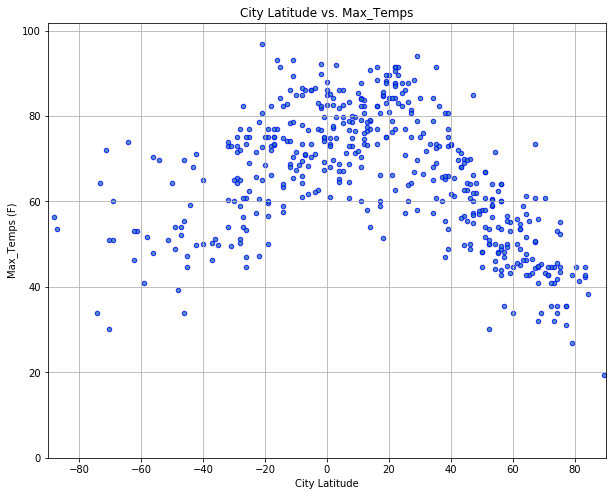

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a series for the needed columns from dataframe
ScatPlot_MaxTemps = clean_city_data_df['Max_Temp']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_MaxTemps.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Max_Temp": List_a,
           "Latitude": List_b}
LatTemp_ScatPlot_df = pd.DataFrame(Listsab)
LatTemp_ScatPlot_df

# Create plot
LatTemp_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Max_Temp", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Max_Temps")
plt.xlabel("City Latitude")
plt.ylabel("Max_Temps (F)")
plt.xlim(-90, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Temps.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

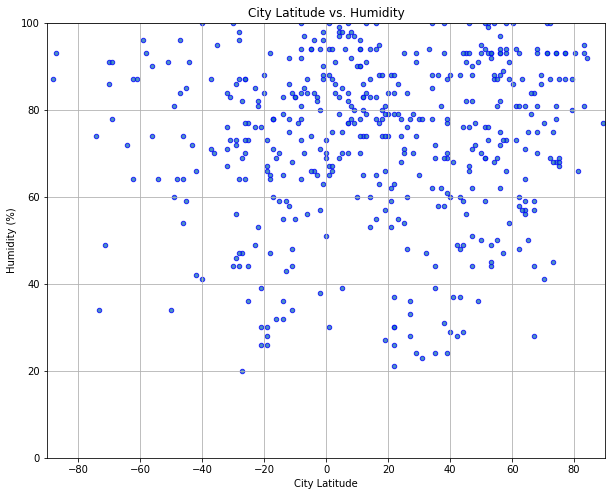

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a series for the needed columns from dataframe
ScatPlot_Hum = clean_city_data_df['Humidity']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Hum.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Humidity": List_a,
           "Latitude": List_b}
LatHum_ScatPlot_df = pd.DataFrame(Listsab)
LatHum_ScatPlot_df

# Create plot
LatHum_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Humidity", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Humidity")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Cloudiness Plot

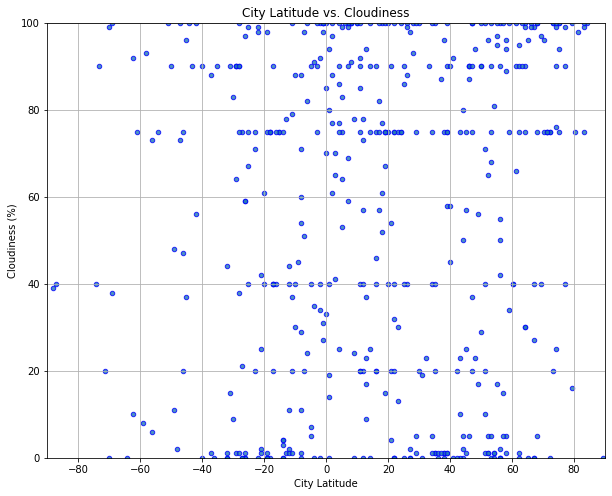

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a series for the needed columns from dataframe
ScatPlot_Cloud = clean_city_data_df['Cloudiness']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Cloud.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Cloudiness": List_a,
           "Latitude": List_b}
LatCloud_ScatPlot_df = pd.DataFrame(Listsab)
LatCloud_ScatPlot_df

# Create plot
LatCloud_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Cloudiness", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(0, 100)
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness.png"))
plt.show()
plt.tight_layout()

## Latitude vs. Wind Speed Plot

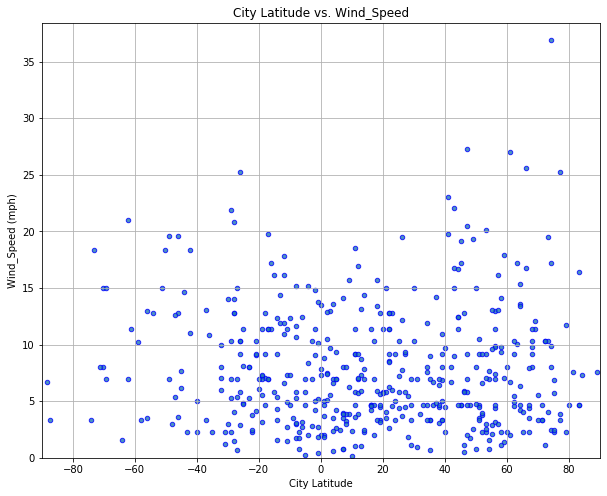

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a series for the needed columns from dataframe
ScatPlot_Wind_Speed = clean_city_data_df['Wind_Speed']
ScatPlot_Lat = clean_city_data_df['Latitude']

# Make lists out of the columns
List_a = ScatPlot_Wind_Speed.values.tolist()
List_b = ScatPlot_Lat.values.tolist()

# Create a dataframe for plot
Listsab = {"Wind_Speed": List_a,
           "Latitude": List_b}
LatWind_Speed_ScatPlot_df = pd.DataFrame(Listsab)
LatWind_Speed_ScatPlot_df
LatWind_Speed_ScatPlot_df['Wind_Speed'].max()

# Create plot
LatWind_Speed_ScatPlot_df.plot(kind='scatter', x="Latitude", y="Wind_Speed", marker="o", edgecolors="blue", alpha=0.8, figsize=(10,8))
plt.title("City Latitude vs. Wind_Speed")
plt.xlabel("City Latitude")
plt.ylabel("Wind_Speed (mph)")
plt.xlim(-90, 90)
plt.ylim(0,(LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+1.5))
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Windspeed.png"))
plt.show()
plt.tight_layout()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6396


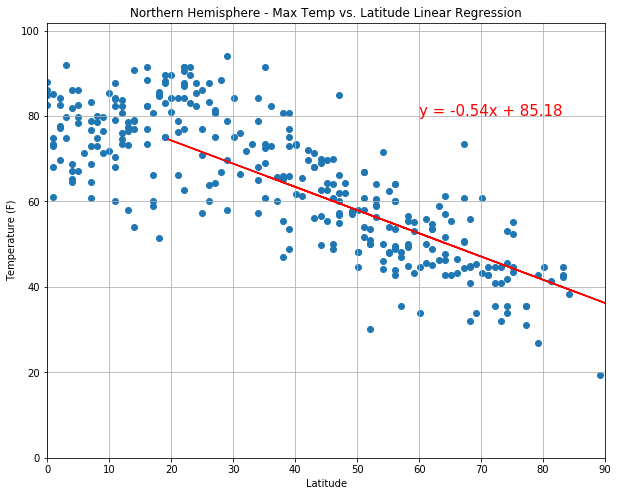

<Figure size 432x288 with 0 Axes>

In [16]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
NorthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
MaxTemp = NorthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = NorthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = MaxTemp * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(MaxTemp, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(0, 90)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_MaxTemp_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.3861


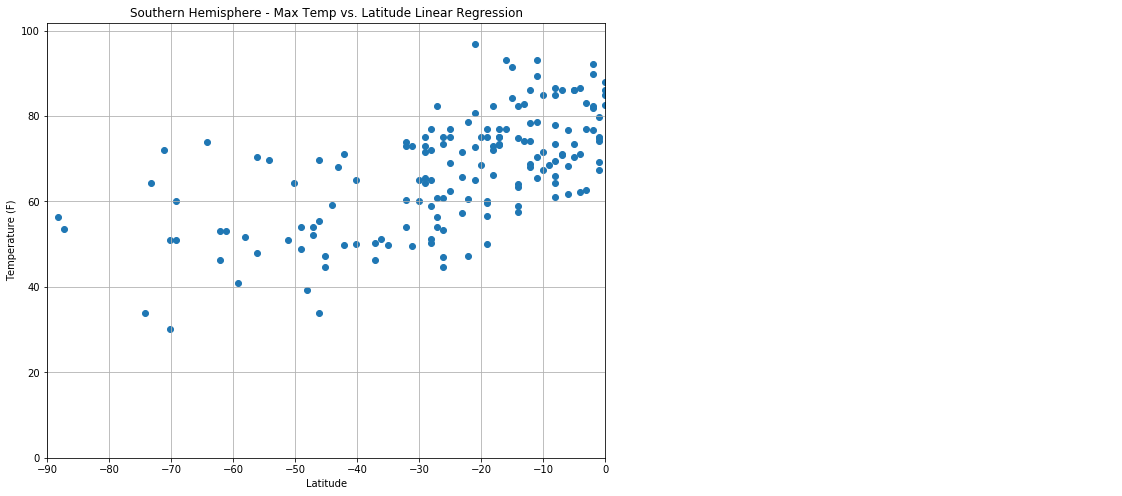

<Figure size 432x288 with 0 Axes>

In [17]:
# dataframe from scatter plot
LatTemp_ScatPlot_df
SouthHem_LatTemp_ScatPlot_df = LatTemp_ScatPlot_df[LatTemp_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
MaxTemp = SouthHem_LatTemp_ScatPlot_df['Max_Temp']
Latitude = SouthHem_LatTemp_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, MaxTemp)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, MaxTemp)

# Calculate the predictions for each value of x
regression_values = MaxTemp * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, MaxTemp)

# Plot the regression line
plt.plot(MaxTemp, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.xlim(-90, 0)
plt.ylim(0, (LatTemp_ScatPlot_df['Max_Temp'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_MaxTemp_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0002


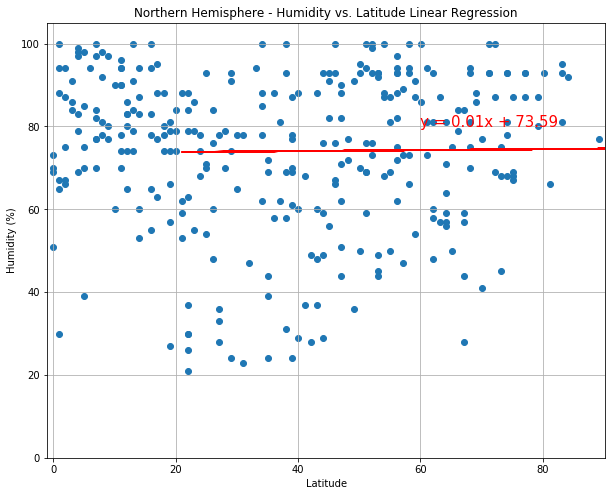

<Figure size 432x288 with 0 Axes>

In [42]:
# dataframe from scatter plot
LatHum_ScatPlot_df
NorthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Humidity = NorthHem_LatHum_ScatPlot_df['Humidity']
Latitude = NorthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Humidity * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Humidity, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((NorthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0023


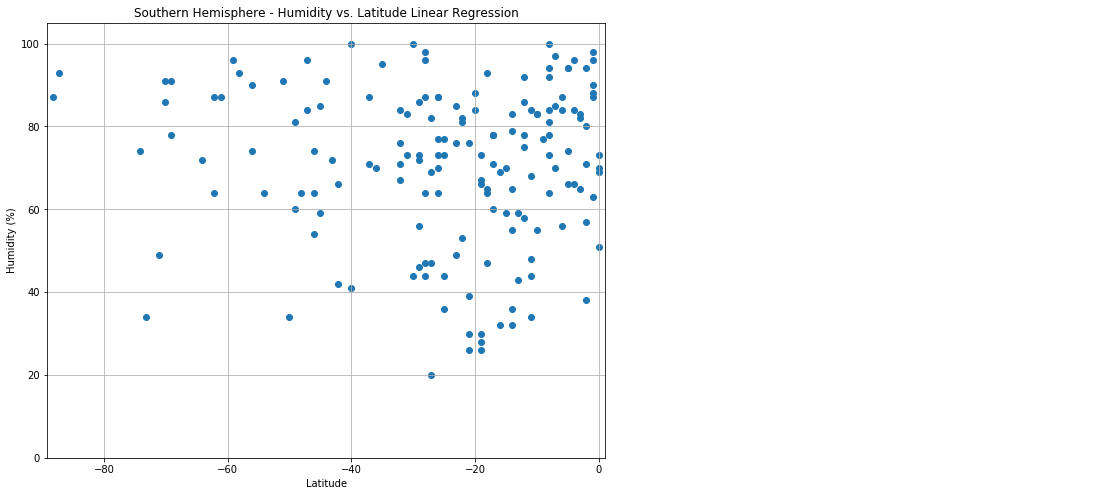

<Figure size 432x288 with 0 Axes>

In [48]:
# dataframe from scatter plot
LatHum_ScatPlot_df
SouthHem_LatHum_ScatPlot_df = LatHum_ScatPlot_df[LatHum_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Humidity = SouthHem_LatHum_ScatPlot_df['Humidity']
Latitude = SouthHem_LatHum_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Humidity)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Humidity)

# Calculate the predictions for each value of x
regression_values = Humidity * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Humidity)

# Plot the regression line
plt.plot(Humidity, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim((SouthHem_LatHum_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatHum_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (LatHum_ScatPlot_df['Humidity'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Humidity_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0


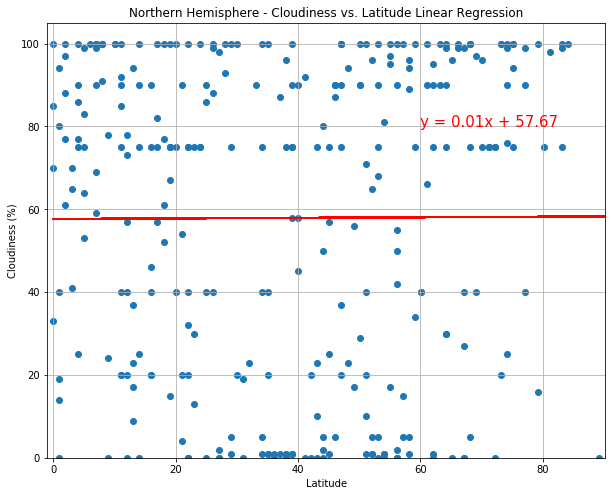

<Figure size 432x288 with 0 Axes>

In [47]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
NorthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Cloud = NorthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = NorthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Cloud * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Cloud, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (60,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((NorthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0001


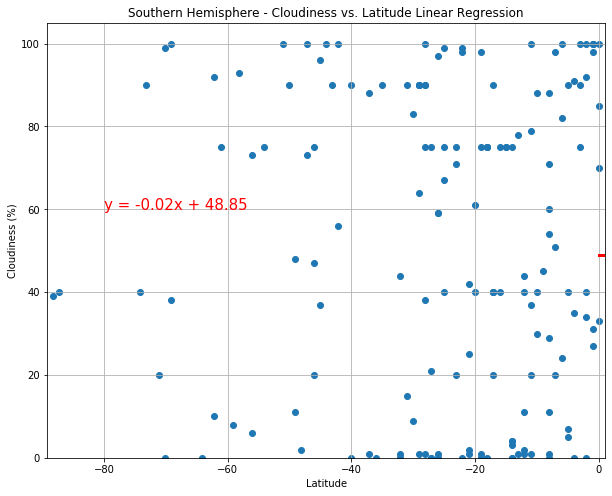

<Figure size 432x288 with 0 Axes>

In [46]:
# dataframe from scatter plot
LatCloud_ScatPlot_df
SouthHem_LatCloud_ScatPlot_df = LatCloud_ScatPlot_df[LatCloud_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Cloud = SouthHem_LatCloud_ScatPlot_df['Cloudiness']
Latitude = SouthHem_LatCloud_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Cloud)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Cloud)

# Calculate the predictions for each value of x
regression_values = Cloud * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Cloud)

# Plot the regression line
plt.plot(Cloud, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim((SouthHem_LatCloud_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatCloud_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatCloud_ScatPlot_df['Cloudiness'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_Cloudiness_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0183


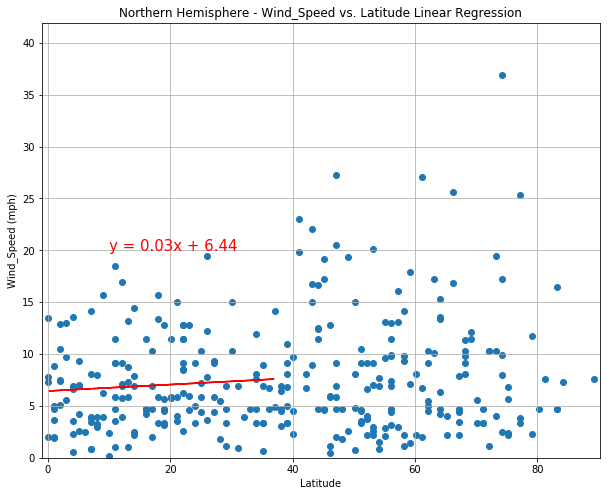

<Figure size 432x288 with 0 Axes>

In [45]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
NorthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude>=0]

#  CORRELATION COEFFICIENT
Wind = NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = NorthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Wind * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Wind, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Northern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (10,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (NorthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (NorthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_WindSpeed_NorthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0257


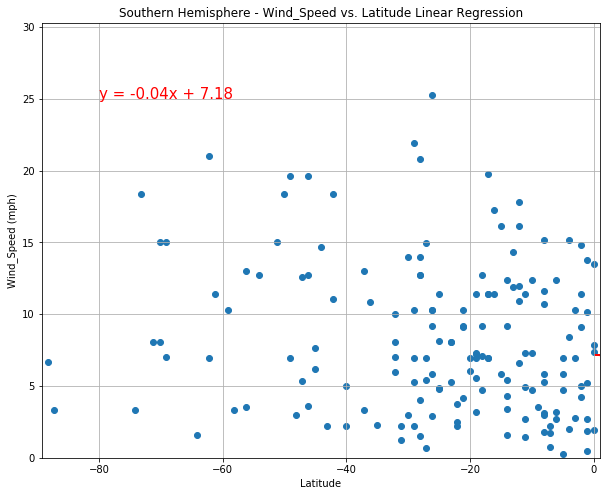

<Figure size 432x288 with 0 Axes>

In [44]:
# dataframe from scatter plot
LatWind_Speed_ScatPlot_df
SouthHem_LatWind_Speed_ScatPlot_df = LatWind_Speed_ScatPlot_df[LatWind_Speed_ScatPlot_df.Latitude<=0]

#  CORRELATION COEFFICIENT
Wind = SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed']
Latitude = SouthHem_LatWind_Speed_ScatPlot_df['Latitude']
correlation = sts.pearsonr(Latitude, Wind)

# print(f"The correlation coefficient (r) is {round(correlation[0],4)}")
# print(f"The p-value is {round(correlation[1],11)}")

#  LINEAR REGRESSION MODEL 
# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(Latitude, Wind)

# Calculate the predictions for each value of x
regression_values = Wind * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.figure(figsize=(10,8))
plt.scatter(Latitude, Wind)

# Plot the regression line
plt.plot(Wind, regression_values, "red")

# Annotate the plot with the linear equation
plt.title("Southern Hemisphere - Wind_Speed vs. Latitude Linear Regression")
plt.annotate(line_eq, (-80,25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed (mph)')
plt.xlim((SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].min()-1), (SouthHem_LatWind_Speed_ScatPlot_df['Latitude'].max()+1))
plt.ylim(0, (SouthHem_LatWind_Speed_ScatPlot_df['Wind_Speed'].max()+5))
print(f"The r-value is: {round(rvalue**2,4)}")
plt.grid(True)
plt.savefig(os.path.join("..","output_data","City_Latitude_vs_WindSpeed_SouthernHemisphere.png"))
plt.show()
plt.tight_layout()

####  Saving csv file

In [20]:
clean_city_data_df.to_csv('clean_city_data.csv', index = False) 
clean_city_data_df.to_csv('../output_data/clean_city_data.csv', index = False) 
summary_stats_df.to_csv('summary_stats.csv', index = False) 
